# Capstone Project - Car accident severity
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)



## Introduction: Business Problem and Background <a name="introduction"></a>

The Seattle government is going to prevent avoidable car accidents by employing methods that alert drivers, health system, and police to remind them to be more careful in critical situations.
In most cases, not paying enough attention during driving, abusing drugs and alcohol or driving at very high speed are the main causes of occurring accidents that can be prevented by enacting harsher regulations. 

Besides the aforementioned reasons, weather, visibility, or road conditions are the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads.

The target audience of the project is local Seattle government, police, rescue groups, and last but not least, car insurance institutes. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city.

## Data <a name="data"></a>

We chose the unbalanced dataset provided by the Seattle Department of Transportation Traffic Management Division with 194673 rows (accidents) and 37 columns (features) where each accident is given a severity code. It covers accidents from January 2004 to May 2020. Some of the features in this dataset include and are not limited to Severity code, Location/Address of accident, Weather condition at the incident site, Driver state (whether under influence or not), collision type. Hence we think its a good generalized dataset which will help us in creating an accurate predictive model.
The unbalance with respect to the severity code in the dataset is as follows.

SEVERITY CODE Count

1 — 136485

2 — 58188

Other important variables include:
    
* ADDRTYPE: Collision address type: Alley, Block, Intersection
* LOCATION: Description of the general location of the collision
* PERSONCOUNT: The total number of people involved in the collision helps identifyseverity level
* PEDCOUNT: The number of pedestrians involved in the collision helps identify
severity level
* PEDCYLCOUNT: The number of bicycles involved in the collision helps identify
severity level
* VEHCOUNT: The number of vehicles involved in the collision identify severity level
* JUNCTIONTYPE: Category of junction at which collision took place helps identify
where most collisions occur
* WEATHER: A description of the weather conditions during the time of the collision
* ROADCOND: The condition of the road during the collision
* LIGHTCOND: The light conditions during the collision
* SPEEDING: Whether or not speeding was a factor in the collision (Y/N)
* SEGLANEKEY: A key for the lane segment in which the collision occurred
* CROSSWALKKEY: A key for the crosswalk at which the collision occurred
* HITPARKEDCAR: Whether or not the collision involved hitting a parked car

## Methodology <a name="data"></a>

### Reading the Data

In [152]:
import pandas as pd
import numpy as np

In [153]:
df = pd.read_csv("Data-Collisions.csv")
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [154]:
print(df["SEVERITYCODE"].value_counts())
print('-'*50)
y = df["SEVERITYCODE"].values
#df.drop(["SEVERITYCODE"], axis=1, inplace=True)
df.drop(["SEVERITYCODE.1"], axis=1, inplace=True)
print("Number of data points in data", df.shape)
print("Number of data points in label", y.shape)

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
--------------------------------------------------
Number of data points in data (194673, 37)
Number of data points in label (194673,)


In [155]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### Data Preprocessing

1. Removal of irrelevant columns

Columns containing descriptions and identification numbers that would not help in the classification are dropped from the data set to reduce the complexity and dimensionality of the data set. ‘OBJECTID’, ‘INCKEY’, ‘COLDETKEY’, ‘REPORTNO’, ‘STATUS’, ‘INTKEY’, ‘EXCEPTRSNCODE’ and more belong to this category. Certain other categorical features were removed as they had a large number of distinct values, example: ‘LOCATION’.

In [156]:
df.drop(["OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "STATUS","INTKEY", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SDOT_COLDESC","ST_COLDESC", "LOCATION"], axis=1, inplace=True)

In [157]:
df.shape

(194673, 23)

In [158]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,...,11,Overcast,Wet,Daylight,NaN,NaN,10,0,0,N
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,16,Raining,Wet,Dark - Street Lights On,6354039.0,NaN,11,0,0,N
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,...,14,Overcast,Dry,Daylight,4323031.0,NaN,32,0,0,N
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,...,11,Clear,Dry,Daylight,NaN,NaN,23,0,0,N
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,...,11,Raining,Wet,Daylight,4028032.0,NaN,10,0,0,N


2. Identification and handling missing values

In [159]:
df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [160]:
df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [161]:
df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [162]:
df["SEVERITYDESC"].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

Number of accidents that are property damage collision 136485 , ( 70.10987656223513 %)
Number of accidents that are injury collision 58188 , ( 29.890123437764863 %)


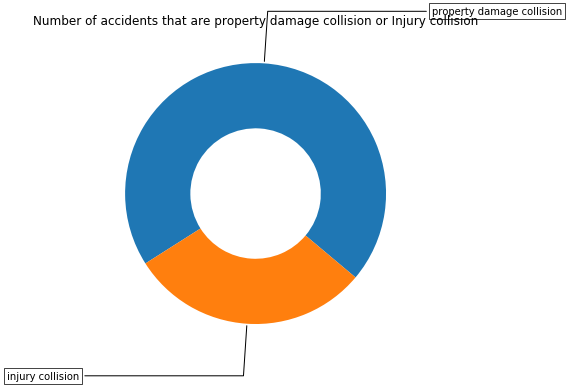

In [163]:
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
import matplotlib.pyplot as plt
import seaborn as sns
y_value_counts = df['SEVERITYCODE'].value_counts()
print("Number of accidents that are property damage collision", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[2]))*100,"%)")
print("Number of accidents that are injury collision", y_value_counts[2], ", (", (y_value_counts[2]/(y_value_counts[1]+y_value_counts[2]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["property damage collision", "injury collision"]

data = [y_value_counts[1], y_value_counts[2]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of accidents that are property damage collision or Injury collision")

plt.show()

In [164]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='SEVERITYCODE', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of Property Damage Collision vs Injury collision')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'property damage collisions'))
    plt.show()

In [165]:
def univariate_barplots(data, col1, col2='SEVERITYCODE', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(df.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(df.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(df.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


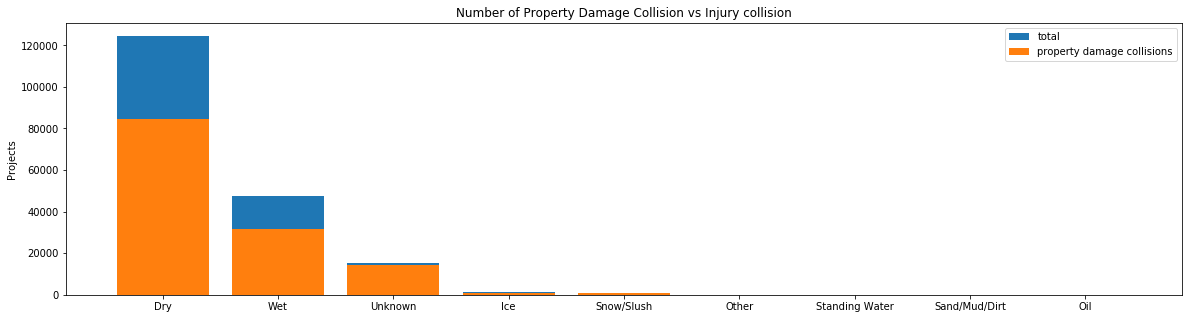

     ROADCOND  SEVERITYCODE   total       Avg
0         Dry         84446  124510  1.321773
8         Wet         31719   47474  1.331866
7     Unknown         14329   15078  1.049675
1         Ice           936    1209  1.225806
5  Snow/Slush           837    1004  1.166335
         ROADCOND  SEVERITYCODE  total       Avg
5      Snow/Slush           837   1004  1.166335
3           Other            89    132  1.325758
6  Standing Water            85    115  1.260870
4   Sand/Mud/Dirt            52     75  1.306667
2             Oil            40     64  1.375000


In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
univariate_barplots(df, 'ROADCOND', 'SEVERITYCODE', False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


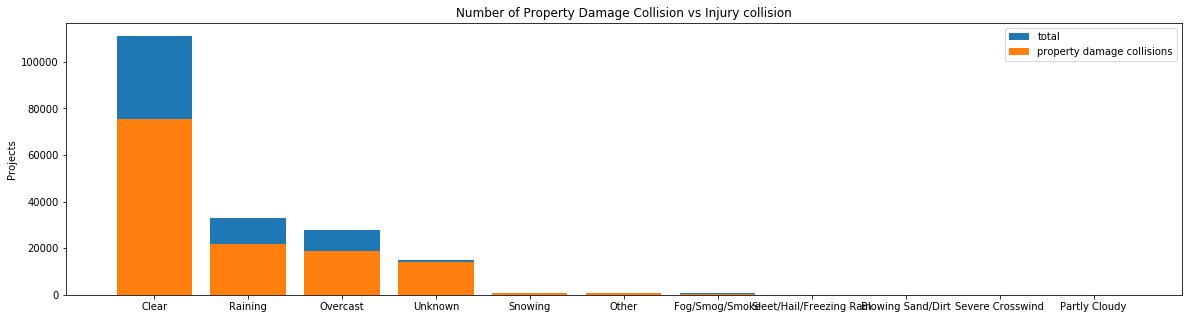

     WEATHER  SEVERITYCODE   total       Avg
1      Clear         75295  111135  1.322491
6    Raining         21969   33145  1.337185
4   Overcast         18969   27714  1.315544
10   Unknown         14275   15091  1.054072
9    Snowing           736     907  1.188534
                    WEATHER  SEVERITYCODE  total       Avg
2            Fog/Smog/Smoke           382    569  1.328647
8  Sleet/Hail/Freezing Rain            85    113  1.247788
0         Blowing Sand/Dirt            41     56  1.267857
7          Severe Crosswind            18     25  1.280000
5             Partly Cloudy             2      5  1.600000


In [167]:
univariate_barplots(df, 'WEATHER', 'SEVERITYCODE', False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


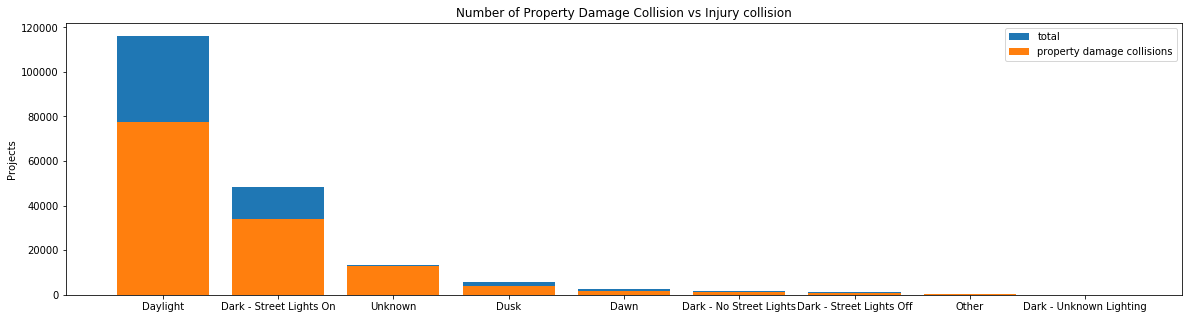

                 LIGHTCOND  SEVERITYCODE   total       Avg
5                 Daylight         77593  116137  1.331884
2  Dark - Street Lights On         34032   48507  1.298411
8                  Unknown         12868   13473  1.044905
6                     Dusk          3958    5902  1.329380
4                     Dawn          1678    2502  1.329337
                  LIGHTCOND  SEVERITYCODE  total       Avg
4                      Dawn          1678   2502  1.329337
0   Dark - No Street Lights          1203   1537  1.217306
1  Dark - Street Lights Off           883   1199  1.263553
7                     Other           183    235  1.221277
3   Dark - Unknown Lighting             7     11  1.363636


In [168]:
univariate_barplots(df, 'LIGHTCOND', 'SEVERITYCODE', False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


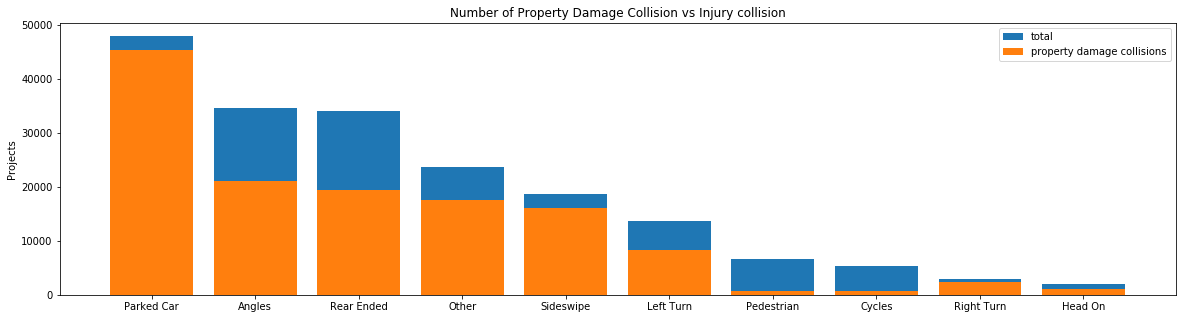

  COLLISIONTYPE  SEVERITYCODE  total       Avg
5    Parked Car         45325  47987  1.055473
0        Angles         21050  34674  1.392917
7    Rear Ended         19419  34090  1.430361
4         Other         17591  23703  1.257858
9     Sideswipe         16103  18609  1.134666
  COLLISIONTYPE  SEVERITYCODE  total       Avg
3     Left Turn          8292  13703  1.394877
6    Pedestrian           672   6608  1.898305
1        Cycles           671   5415  1.876085
8    Right Turn          2347   2956  1.206022
2       Head On          1152   2024  1.430830


In [169]:
univariate_barplots(df, 'COLLISIONTYPE', 'SEVERITYCODE', False)

In [170]:
df.drop(["SEVERITYCODE"], axis=1, inplace=True)
df.drop(["SEVERITYDESC"], axis=1, inplace=True)
df.shape

(194673, 21)

In [171]:
df['X'] = df['X'].fillna(df['X'].mean())
df['Y'] = df['Y'].fillna(df['Y'].mean())
df['SDOTCOLNUM'] = df['SDOTCOLNUM'].fillna(df['SDOTCOLNUM'].median())
#df['ST_COLCODE'] = df['ST_COLCODE'].fillna(df['ST_COLCODE'].median())
df['SPEEDING'] = df['SPEEDING'].fillna("N")
df.head()

,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,...,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.323148,47.703140,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,...,11,Overcast,Wet,Daylight,8023022.5,N,10,0,0,N
1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,...,16,Raining,Wet,Dark - Street Lights On,6354039.0,N,11,0,0,N
2,-122.334540,47.607871,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,...,14,Overcast,Dry,Daylight,4323031.0,N,32,0,0,N
3,-122.334803,47.604803,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,...,11,Clear,Dry,Daylight,8023022.5,N,23,0,0,N
4,-122.306426,47.545739,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,...,11,Raining,Wet,Daylight,4028032.0,N,10,0,0,N


In [172]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [174]:
df.head()

,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,...,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.323148,47.703140,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,...,11,Overcast,Wet,Daylight,8023022.5,N,10,0,0,N
1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,...,16,Raining,Wet,Dark - Street Lights On,6354039.0,N,11,0,0,N
2,-122.334540,47.607871,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,...,14,Overcast,Dry,Daylight,4323031.0,N,32,0,0,N
3,-122.334803,47.604803,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,...,11,Clear,Dry,Daylight,8023022.5,N,23,0,0,N
4,-122.306426,47.545739,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,...,11,Raining,Wet,Daylight,4028032.0,N,10,0,0,N


## Convert Categorical features to numerical values

In [175]:
df['ADDRTYPE'].replace(to_replace=['Intersection','Block', 'Alley'], value=[0,1,2],inplace=True)

In [176]:
df['COLLISIONTYPE'].replace(to_replace=['angles', 'car', 'cycles', 'ended', 'head', 'left', 'on', 'other', 'parked', 'pedestrian', 'rear', 'right', 'sideswipe', 'turn'], value=[0,1,2,3,4,5,6,7,8,9,10,11,12,12],inplace=True)

In [178]:
df['JUNCTIONTYPE'].replace(to_replace=['at', 'block', 'but', 'driveway', 'intersection', 'junction', 'mid', 'not', 'ramp', 'related', 'to', 'unknown'], value=[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

In [179]:
df['WEATHER'].replace(to_replace=['blowing', 'clear', 'cloudy', 'crosswind', 'dirt', 'fog', 'freezing', 'hail', 'other', 'overcast', 'partly', 'rain', 'raining', 'sand', 'severe', 'sleet', 'smog', 'smoke', 'snowing', 'unknown'], value=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],inplace=True)

In [180]:
df['ROADCOND'].replace(to_replace=['dirt', 'dry', 'ice', 'mud', 'oil', 'other', 'sand', 'slush', 'snow', 'standing', 'unknown', 'water', 'wet'], value=[0,1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

In [181]:
df['LIGHTCOND'].replace(to_replace=['dark', 'dawn', 'daylight', 'dusk', 'lighting', 'lights', 'no', 'off', 'on', 'other', 'street', 'unknown'], value=[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

In [182]:
df.shape

(194673, 21)

In [183]:
df.columns

Index(['X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SDOTCOLNUM',
       'SPEEDING', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

TypeError: Singleton array -0.9977988856162393 cannot be considered a valid collection.

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_train == 2))

In [138]:
df.head()

,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,...,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.323148,47.703140,0,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,...,11,Overcast,Wet,Daylight,8023022.5,N,10,0,0,N
1,-122.347294,47.647172,1,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,...,16,Raining,Wet,Dark - Street Lights On,6354039.0,N,11,0,0,N
2,-122.334540,47.607871,1,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,...,14,Overcast,Dry,Daylight,4323031.0,N,32,0,0,N
3,-122.334803,47.604803,1,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,...,11,Clear,Dry,Daylight,8023022.5,N,23,0,0,N
4,-122.306426,47.545739,0,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,...,11,Raining,Wet,Daylight,4028032.0,N,10,0,0,N


## one hot encoding the catogorical features:

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

In [140]:
vectorizer = CountVectorizer()
vectorizer.fit(df['COLLISIONTYPE'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
COLLISIONTYPE_ohe = vectorizer.transform(df['COLLISIONTYPE'].values)

print("After vectorizations")
print(COLLISIONTYPE_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(194673, 14) ()
['angles', 'car', 'cycles', 'ended', 'head', 'left', 'on', 'other', 'parked', 'pedestrian', 'rear', 'right', 'sideswipe', 'turn']


In [141]:
vectorizer.fit(df['JUNCTIONTYPE'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
JUNCTIONTYPE_ohe = vectorizer.transform(df['JUNCTIONTYPE'].values)

print("After vectorizations")
print(JUNCTIONTYPE_ohe.shape, y.shape)
print(vectorizer.get_feature_names())

After vectorizations
(194673, 12) ()
['at', 'block', 'but', 'driveway', 'intersection', 'junction', 'mid', 'not', 'ramp', 'related', 'to', 'unknown']


In [142]:
vectorizer.fit(df['WEATHER'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
WEATHER_ohe = vectorizer.transform(df['WEATHER'].values)

print("After vectorizations")
print(WEATHER_ohe.shape, y.shape)
print(vectorizer.get_feature_names())

After vectorizations
(194673, 20) ()
['blowing', 'clear', 'cloudy', 'crosswind', 'dirt', 'fog', 'freezing', 'hail', 'other', 'overcast', 'partly', 'rain', 'raining', 'sand', 'severe', 'sleet', 'smog', 'smoke', 'snowing', 'unknown']


In [143]:
vectorizer.fit(df['ROADCOND'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
ROADCOND_ohe = vectorizer.transform(df['ROADCOND'].values)

print("After vectorizations")
print(ROADCOND_ohe.shape, y.shape)
print(vectorizer.get_feature_names())

After vectorizations
(194673, 13) ()
['dirt', 'dry', 'ice', 'mud', 'oil', 'other', 'sand', 'slush', 'snow', 'standing', 'unknown', 'water', 'wet']


In [144]:
vectorizer.fit(df['LIGHTCOND'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
LIGHTCOND_ohe = vectorizer.transform(df['LIGHTCOND'].values)

print("After vectorizations")
print(LIGHTCOND_ohe.shape, y.shape)
print(vectorizer.get_feature_names())

After vectorizations
(194673, 12) ()
['dark', 'dawn', 'daylight', 'dusk', 'lighting', 'lights', 'no', 'off', 'on', 'other', 'street', 'unknown']


In [145]:
df=df[['X', 'Y', 'ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT','PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM','SDOT_COLCODE', 'SDOTCOLNUM','SPEEDING', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']]

In [146]:
df.shape

(194673, 16)

In [ ]:
data[column].value_counts().index.tolist()

In [147]:
from scipy.sparse import hstack
df_1 = hstack((COLLISIONTYPE_ohe, JUNCTIONTYPE_ohe, WEATHER_ohe, ROADCOND_ohe, LIGHTCOND_ohe)).tocsr()

In [148]:
df_1.shape

(194673, 71)

In [149]:
df_2 = pd.DataFrame(df_1.toarray())
df_3 = df_2.join(df)
df_3.shape

(194673, 87)

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size=0.2)

TypeError: Singleton array -0.9977988856162393 cannot be considered a valid collection.

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_train == 2))